# Examen de Aprendizaje Supervisado

**Instrucciones:**
Utiliza los archivos `hospital_data.csv` y `students_data.csv` para responder las siguientes preguntas. Escribe tu código en las celdas correspondientes.

## 1. Cargar los datos
Carga ambos archivos CSV en dos DataFrames de pandas.

In [2]:
import pandas as pd
# Cargar los datos
df_hospital = pd.read_csv('hospital_data.csv')
df_students = pd.read_csv('students_data.csv')

## 2. Exploración inicial
Muestra las primeras 5 filas y las estadísticas descriptivas de cada conjunto de datos.

In [3]:
# Exploración inicial hospital
display(df_hospital.head())
display(df_hospital.describe(include='all'))

# Exploración inicial students
display(df_students.head())
display(df_students.describe(include='all'))

,Age,Blood_Pressure,Cholesterol,Heart_Rate,Gender,Diagnosis,Smoker,Exercise,Risk_Level
0,51,113,225,96,Male,Diabetes,No,NaN,High Risk
1,92,87,270,63,Female,Healthy,No,Occasional,High Risk
2,14,119,195,89,Male,Heart Disease,No,Occasional,Low Risk
3,71,162,229,65,Male,Heart Disease,Yes,NaN,High Risk
4,60,121,203,78,Female,Heart Disease,Yes,Occasional,High Risk


,Age,Blood_Pressure,Cholesterol,Heart_Rate,Gender,Diagnosis,Smoker,Exercise,Risk_Level
count,1000.000000,1000.00000,1000.000000,1000.00000,1000,1000,1000,677,1000
unique,NaN,NaN,NaN,NaN,2,4,2,2,2
top,NaN,NaN,NaN,NaN,Male,Heart Disease,No,Occasional,High Risk
freq,NaN,NaN,NaN,NaN,518,269,505,350,503
mean,49.128000,128.94800,226.640000,79.92800,NaN,NaN,NaN,NaN,NaN
std,29.573505,29.13304,44.696064,11.49282,NaN,NaN,NaN,NaN,NaN
min,0.000000,80.00000,150.000000,60.00000,NaN,NaN,NaN,NaN,NaN
25%,23.000000,104.00000,188.000000,70.00000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,128.00000,228.000000,80.00000,NaN,NaN,NaN,NaN,NaN
75%,74.000000,154.00000,267.000000,90.00000,NaN,NaN,NaN,NaN,NaN


,GPA,Attendance,Study_Hours,Projects_Completed,Major,Year,Scholarship,Extracurricular,Result
0,3.52,66,37,0,Business,Junior,Yes,Music,Fail
1,2.06,70,13,9,Business,Senior,Yes,NaN,Fail
2,2.16,95,18,7,Engineering,Senior,No,NaN,Pass
3,1.02,65,29,8,Science,Freshman,No,Music,Pass
4,3.07,95,4,6,Business,Sophomore,No,Sports,Fail


,GPA,Attendance,Study_Hours,Projects_Completed,Major,Year,Scholarship,Extracurricular,Result
count,1000.000000,1000.000000,1000.000000,1000.0000,1000,1000,1000,740,1000
unique,NaN,NaN,NaN,NaN,4,4,2,3,2
top,NaN,NaN,NaN,NaN,Business,Sophomore,No,Music,Fail
freq,NaN,NaN,NaN,NaN,271,258,510,269,508
mean,1.989410,73.735000,19.248000,4.6740,NaN,NaN,NaN,NaN,NaN
std,1.170704,14.298994,11.400722,2.8555,NaN,NaN,NaN,NaN,NaN
min,0.000000,50.000000,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN
25%,0.950000,62.000000,10.000000,2.0000,NaN,NaN,NaN,NaN,NaN
50%,2.010000,73.000000,19.000000,5.0000,NaN,NaN,NaN,NaN,NaN
75%,2.940000,86.000000,29.000000,7.0000,NaN,NaN,NaN,NaN,NaN


## 3. Análisis de la variable objetivo
Muestra la distribución de la variable Risk_Level en hospitaldf y Result en studentsdf.

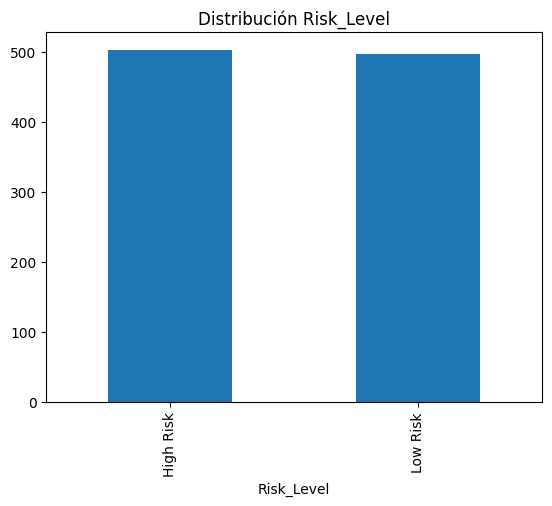

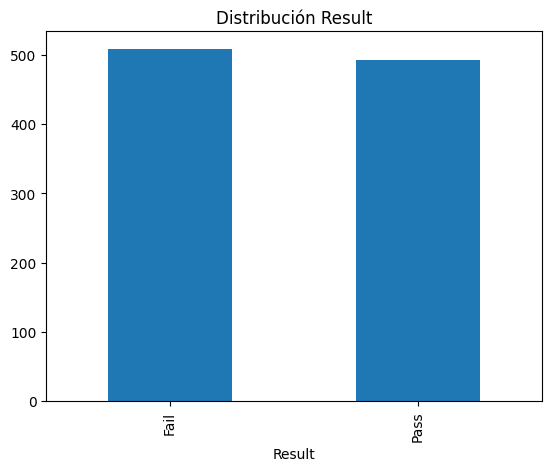

In [4]:
import matplotlib.pyplot as plt

# Distribución Risk_Level
df_hospital['Risk_Level'].value_counts().plot(kind='bar', title='Distribución Risk_Level')
plt.show()

# Distribución Result
df_students['Result'].value_counts().plot(kind='bar', title='Distribución Result')
plt.show()

## 4. Preprocesamiento
- Codifica las variables categóricas.
- Normaliza las variables numéricas si es necesario.

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copias para preprocesar
df_hosp = df_hospital.copy()
df_stud = df_students.copy()

# Codificar categóricas
def encode_categoricals(df, target):
    for col in df.select_dtypes(include='object').columns:
        if col != target:
            df[col] = LabelEncoder().fit_transform(df[col])
    return df

df_hosp = encode_categoricals(df_hosp, 'Risk_Level')
df_stud = encode_categoricals(df_stud, 'Result')

# Codificar variable objetivo
df_hosp['Risk_Level'] = LabelEncoder().fit_transform(df_hosp['Risk_Level'])
df_stud['Result'] = LabelEncoder().fit_transform(df_stud['Result'])

# Normalizar numéricas
def normalize(df, exclude):
    scaler = StandardScaler()
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference([exclude])
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

df_hosp = normalize(df_hosp, 'Risk_Level')
df_stud = normalize(df_stud, 'Result')

## 5. División de datos
Divide los datos en conjuntos de entrenamiento y prueba (80/20).

In [6]:
from sklearn.model_selection import train_test_split

# Hospital
y_hosp = df_hosp['Risk_Level']
X_hosp = df_hosp.drop('Risk_Level', axis=1)
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_hosp, y_hosp, test_size=0.2, random_state=42)

# Students
y_stud = df_stud['Result']
X_stud = df_stud.drop('Result', axis=1)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_stud, y_stud, test_size=0.2, random_state=42)

## 6. Entrenamiento de modelos
Entrena al menos dos modelos de clasificación (por ejemplo, Regresión Logística y Árbol de Decisión) para cada conjunto de datos.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Hospital
log_hosp = LogisticRegression(max_iter=1000)
log_hosp.fit(Xh_train, yh_train)
dt_hosp = DecisionTreeClassifier(random_state=42)
dt_hosp.fit(Xh_train, yh_train)

# Students
log_stud = LogisticRegression(max_iter=1000)
log_stud.fit(Xs_train, ys_train)
dt_stud = DecisionTreeClassifier(random_state=42)
dt_stud.fit(Xs_train, ys_train)

DecisionTreeClassifier(random_state=42)

## 7. Evaluación de modelos
Evalúa los modelos usando métricas como precisión, recall, F1-score y matriz de confusión.

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def eval_model(model, X, y, nombre):
    y_pred = model.predict(X)
    print(f"\nEvaluación para {nombre}:")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred, average='weighted'))
    print("Recall:", recall_score(y, y_pred, average='weighted'))
    print("F1-score:", f1_score(y, y_pred, average='weighted'))
    print("Matriz de confusión:\n", confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))

print("--- Modelos Hospital Data ---")
eval_model(log_hosp, Xh_test, yh_test, 'Logistic Regression (Hospital)')
eval_model(dt_hosp, Xh_test, yh_test, 'Decision Tree (Hospital)')

print("\n--- Modelos Students Data ---")
eval_model(log_stud, Xs_test, ys_test, 'Logistic Regression (Students)')
eval_model(dt_stud, Xs_test, ys_test, 'Decision Tree (Students)')

--- Modelos Hospital Data ---

Evaluación para Logistic Regression (Hospital):
Accuracy: 0.47
Precision: 0.48214562192697985
Recall: 0.47
F1-score: 0.4652127659574468
Matriz de confusión:
 [[53 38]
 [68 41]]
              precision    recall  f1-score   support

           0       0.44      0.58      0.50        91
           1       0.52      0.38      0.44       109

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200


Evaluación para Decision Tree (Hospital):
Accuracy: 0.515
Precision: 0.5154408212560386
Recall: 0.515
F1-score: 0.5152076250912846
Matriz de confusión:
 [[43 48]
 [49 60]]
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        91
           1       0.56      0.55      0.55       109

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0

## 8. Comparación de modelos
Compara el rendimiento de los modelos y justifica cuál elegirías para cada conjunto de datos.

### Análisis de resultados para Hospital Data

**Regresión Logística:**
- Accuracy: 0.47
- Precision: 0.48
- Recall: 0.47
- F1-score: 0.47
- La matriz de confusión muestra que el modelo tiene dificultades para distinguir entre las clases, con un desempeño apenas superior al azar. El recall para la clase 1 (positiva) es bajo (0.38), lo que indica que muchos casos positivos no son detectados.

**Árbol de Decisión:**
- Accuracy: 0.52
- Precision: 0.52
- Recall: 0.52
- F1-score: 0.52
- El árbol de decisión mejora ligeramente el desempeño respecto a la regresión logística, pero aún así el modelo no logra una buena discriminación entre clases. El accuracy y las demás métricas apenas superan el 50%, lo que sugiere que los datos pueden ser complejos o que se requiere mayor preprocesamiento o ajuste de hiperparámetros.

**Conclusión:**
- Para el conjunto de datos hospital, el árbol de decisión es preferible sobre la regresión logística, aunque ambos modelos muestran un desempeño limitado. Se recomienda explorar más el preprocesamiento, ingeniería de variables o probar otros modelos para mejorar los resultados.